# K Valley

In [1]:
import numpy as np

# Constants
e = 1.602176634e-19  # Elementary charge (C)
m_e = 9.10938356e-31 # Electron mass (kg)
hbar = 1.054571817e-34 # Reduced Planck's constant (J·s)
gamma_1 = 0.39 * e    # Interlayer coupling energy (J)
B = 25                # Magnetic field (T)
m_eff = 0.03 * m_e    # Effective mass of electron in BLG
omega_B = e * B / m_eff # Cyclotron frequency (rad/s)

# Function to construct the Hamiltonian matrix
def hamiltonian_matrix(n):
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    
    H = np.array([
        [0, hbar_omega_B_n, 0, 0],
        [hbar_omega_B_n, 0, gamma_1, 0],
        [0, gamma_1, 0, hbar_omega_B_n_plus_1],
        [0, 0, hbar_omega_B_n_plus_1, 0]
    ])
    return H

# Compute eigenvalues for different n
n_values = range(1, 6) # Landau levels n >= 1
eigenvalues_all_levels = []

for n in n_values:
    H = hamiltonian_matrix(n)
    eigenvalues, eigenvectors = np.linalg.eigh(H) # Compute eigenvalues
    eigenvalues_all_levels.append(eigenvalues / e) # Convert to eV

# Compute eigenvalues and energy gaps for all Landau levels (n=1 to n=10)
n_levels = range(1, 11) # Landau levels from n=1 to n=10
results = {} # Dictionary to store results for each n

for n in n_levels:
    H = hamiltonian_matrix(n) # Construct Hamiltonian matrix for level n
    eigenvalues, eigenvectors = np.linalg.eigh(H) # Compute eigenvalues and eigenvectors
    eigenvalues_eV = eigenvalues / e # Convert eigenvalues to eV
    energy_gaps_eV = np.diff(eigenvalues_eV) # Compute energy gaps between consecutive eigenvalues
    results[n] = {
        "eigenvalues": eigenvalues_eV,
        "energy_gaps": energy_gaps_eV
    }

# Display results for all levels
for n in n_levels:
    print(f"Landau Level n={n}:")
    print(f"Eigenvalues (in eV): {results[n]['eigenvalues']}")
    print(f"Energy Gaps Between Consecutive Eigenvalues (in eV): {results[n]['energy_gaps']}")
    print()

Landau Level n=1:
Eigenvalues (in eV): [-0.42314725 -0.03110537  0.03110537  0.42314725]
Energy Gaps Between Consecutive Eigenvalues (in eV): [0.39204188 0.06221073 0.39204188]

Landau Level n=2:
Eigenvalues (in eV): [-0.44270005 -0.05149652  0.05149652  0.44270005]
Energy Gaps Between Consecutive Eigenvalues (in eV): [0.39120353 0.10299305 0.39120353]

Landau Level n=3:
Eigenvalues (in eV): [-0.4608193  -0.06996355  0.06996355  0.4608193 ]
Energy Gaps Between Consecutive Eigenvalues (in eV): [0.39085575 0.13992709 0.39085575]

Landau Level n=4:
Eigenvalues (in eV): [-0.47778049 -0.0871161   0.0871161   0.47778049]
Energy Gaps Between Consecutive Eigenvalues (in eV): [0.39066439 0.17423221 0.39066439]

Landau Level n=5:
Eigenvalues (in eV): [-0.49378081 -0.10323769  0.10323769  0.49378081]
Energy Gaps Between Consecutive Eigenvalues (in eV): [0.39054312 0.20647538 0.39054312]

Landau Level n=6:
Eigenvalues (in eV): [-0.5089671  -0.11850776  0.11850776  0.5089671 ]
Energy Gaps Between C

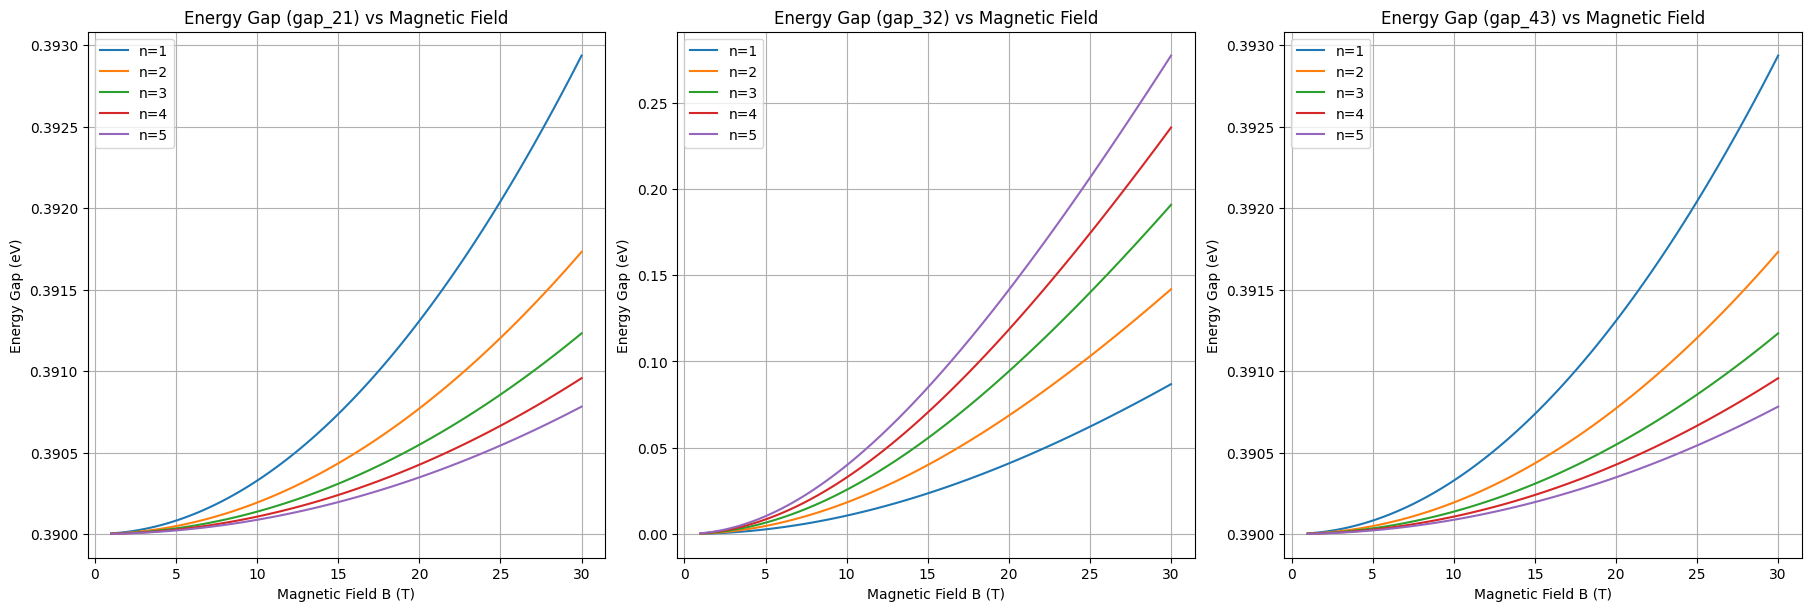

In [2]:
import matplotlib.pyplot as plt

# Function to construct the Hamiltonian matrix
def hamiltonian_matrix(n, omega_B):
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    
    H = np.array([
        [0, hbar_omega_B_n, 0, 0],
        [hbar_omega_B_n, 0, gamma_1, 0],
        [0, gamma_1, 0, hbar_omega_B_n_plus_1],
        [0, 0, hbar_omega_B_n_plus_1, 0]
    ])
    return H

# Magnetic field range (1 T to 30 T)
B_values = np.linspace(1, 30, 100) # Generate 100 points between 1 and 30 Tesla

# Compute energy gaps for each Landau level and magnetic field
n_levels = range(1, 6) # Landau levels n=1 to n=5
energy_gaps_21_vs_B = {n: [] for n in n_levels}
energy_gaps_32_vs_B = {n: [] for n in n_levels}
energy_gaps_43_vs_B = {n: [] for n in n_levels}

for B in B_values:
    omega_B = e * B / m_eff # Cyclotron frequency
    for n in n_levels:
        H = hamiltonian_matrix(n, omega_B)
        eigenvalues = np.linalg.eigvalsh(H) / e # Compute eigenvalues in eV
        gap_21 = eigenvalues[1] - eigenvalues[0]
        gap_32 = eigenvalues[2] - eigenvalues[1]   # Energy gap between second and third eigenvalues
        gap_43 = eigenvalues[3] - eigenvalues[2]
        energy_gaps_21_vs_B[n].append(gap_21)
        energy_gaps_32_vs_B[n].append(gap_32)
        energy_gaps_43_vs_B[n].append(gap_43)

import matplotlib.pyplot as plt

# Create a figure with 3 subplots (axes) in a single row
fig, ax = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Plot for gap_21 (energy gap between the first and second eigenvalues)
for n in n_levels:
    ax[0].plot(B_values, energy_gaps_21_vs_B[n], label=f"n={n}")
ax[0].set_xlabel("Magnetic Field B (T)")
ax[0].set_ylabel("Energy Gap (eV)")
ax[0].set_title("Energy Gap (gap_21) vs Magnetic Field")
ax[0].grid(True)
ax[0].legend()

# Plot for gap_32 (energy gap between the second and third eigenvalues)
for n in n_levels:
    ax[1].plot(B_values, energy_gaps_32_vs_B[n], label=f"n={n}")
ax[1].set_xlabel("Magnetic Field B (T)")
ax[1].set_ylabel("Energy Gap (eV)")
ax[1].set_title("Energy Gap (gap_32) vs Magnetic Field")
ax[1].grid(True)
ax[1].legend()

# Plot for gap_43 (energy gap between the third and fourth eigenvalues)
for n in n_levels:
    ax[2].plot(B_values, energy_gaps_43_vs_B[n], label=f"n={n}")
ax[2].set_xlabel("Magnetic Field B (T)")
ax[2].set_ylabel("Energy Gap (eV)")
ax[2].set_title("Energy Gap (gap_43) vs Magnetic Field")
ax[2].grid(True)
ax[2].legend()

# Show the plots
plt.show()

## Introducing Electric Field

In [3]:
d = 3.35e-10          # Interlayer distance for BLG (m)
E_field = 35          # Electric field in mV/nm (convert to V/m)

# Convert electric field to potential difference
E_field_V_per_m = E_field * 1e6  # Convert mV/nm to V/m
potential_difference = e * E_field_V_per_m * d / 2

# Function to construct the Hamiltonian matrix with displacement field
def hamiltonian_matrix_E(n):
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    
    H_E = np.array([
        [potential_difference, hbar_omega_B_n, 0, 0],
        [hbar_omega_B_n, potential_difference, gamma_1, 0],
        [0, gamma_1, -potential_difference, hbar_omega_B_n_plus_1],
        [0, 0, hbar_omega_B_n_plus_1, -potential_difference]
    ])
    return H_E

# Compute eigenvalues for different n
n_values = range(1, 6) # Landau levels n >= 1
eigenvalues_all_levels_E = []



for n in n_values:
    H_E = hamiltonian_matrix_E(n)
    eigenvalues_E, eigenvectors_E = np.linalg.eigh(H_E) # Compute eigenvalues
    eigenvalues_all_levels_E.append(eigenvalues_E / e) # Convert to eV

# Compute eigenvalues and energy gaps for all Landau levels (n=1 to n=10)
n_levels = range(1, 11) # Landau levels from n=1 to n=10
results = {} # Dictionary to store results for each n

for n in n_levels:
    H_E = hamiltonian_matrix_E(n) # Construct Hamiltonian matrix for level n
    eigenvalues_E, eigenvectors_E = np.linalg.eigh(H_E) # Compute eigenvalues and eigenvectors
    eigenvalues_eV_E = eigenvalues_E / e # Convert eigenvalues to eV
    energy_gaps_eV_E = np.diff(eigenvalues_eV_E) # Compute energy gaps between consecutive eigenvalues
    results[n] = {
        "eigenvalues": eigenvalues_eV_E,
        "energy_gaps": energy_gaps_eV_E
    }

# Display results for all levels
for n in n_levels:
    print(f"Landau Level n={n}:")
    print(f"Eigenvalues (in eV): {results[n]['eigenvalues']}")
    print(f"Energy Gaps Between Consecutive Eigenvalues (in eV): {results[n]['energy_gaps']}")
    print()

Landau Level n=1:
Eigenvalues (in eV): [-0.43684353 -0.04324604  0.0440794   0.43601017]
Energy Gaps Between Consecutive Eigenvalues (in eV): [0.39359749 0.08732544 0.39193077]

Landau Level n=2:
Eigenvalues (in eV): [-0.4631203  -0.07066432  0.07141588  0.46236874]
Energy Gaps Between Consecutive Eigenvalues (in eV): [0.39245597 0.14208021 0.39095286]

Landau Level n=3:
Eigenvalues (in eV): [-0.48704363 -0.09509046  0.09578038  0.48635372]
Energy Gaps Between Consecutive Eigenvalues (in eV): [0.39195317 0.19087084 0.39057334]

Landau Level n=4:
Eigenvalues (in eV): [-0.50915125 -0.11748965  0.11813096  0.50850994]
Energy Gaps Between Consecutive Eigenvalues (in eV): [0.39166161 0.23562061 0.39037898]

Landau Level n=5:
Eigenvalues (in eV): [-0.5298028  -0.13833482  0.13893654  0.52920109]
Energy Gaps Between Consecutive Eigenvalues (in eV): [0.39146798 0.27727137 0.39026454]

Landau Level n=6:
Eigenvalues (in eV): [-0.54925288 -0.15792439  0.15849305  0.54868423]
Energy Gaps Between C

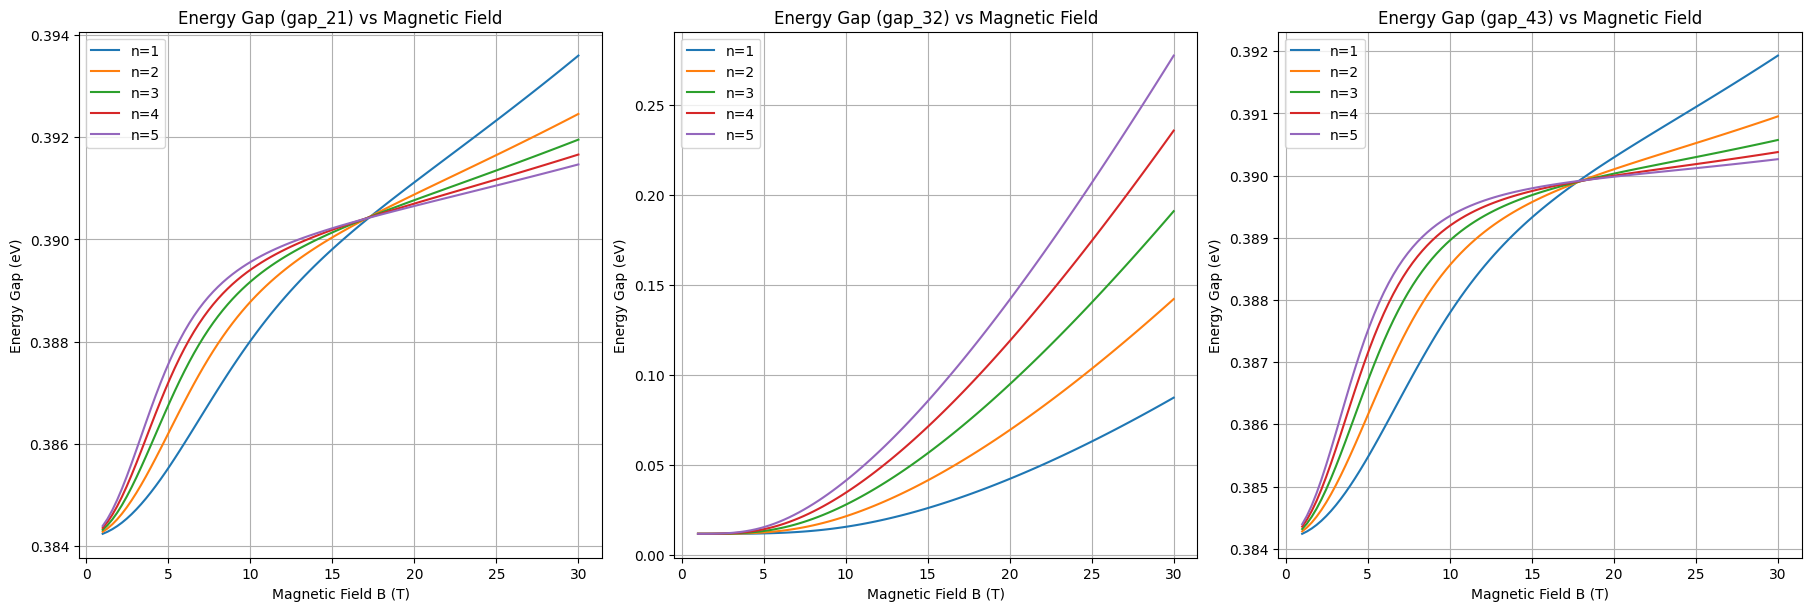

In [4]:
# Function to construct the Hamiltonian matrix with displacement field
def hamiltonian_matrix_E(n, omega_B):
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    
    H_E = np.array([
        [potential_difference, hbar_omega_B_n, 0, 0],
        [hbar_omega_B_n, potential_difference, gamma_1, 0],
        [0, gamma_1, -potential_difference, hbar_omega_B_n_plus_1],
        [0, 0, hbar_omega_B_n_plus_1, -potential_difference]
    ])
    return H_E

# Magnetic field range (1 T to 30 T)
B_values = np.linspace(1, 30, 100) # Generate 100 points between 1 and 30 Tesla

# Compute energy gaps for each Landau level and magnetic field
n_levels = range(1, 6) # Landau levels n=1 to n=10
energy_gaps_E_21_vs_B = {n: [] for n in n_levels}
energy_gaps_E_32_vs_B = {n: [] for n in n_levels}
energy_gaps_E_43_vs_B = {n: [] for n in n_levels}

for B in B_values:
    omega_B = e * B / m_eff # Cyclotron frequency
    for n in n_levels:
        H_E = hamiltonian_matrix_E(n, omega_B)
        eigenvalues_E = np.linalg.eigvalsh(H_E) / e # Compute eigenvalues in eV
        gap_E_21 = eigenvalues_E[1] - eigenvalues_E[0]
        gap_E_32 = eigenvalues_E[2] - eigenvalues_E[1]   # Energy gap between second and third eigenvalues
        gap_E_43 = eigenvalues_E[3] - eigenvalues_E[2]
        energy_gaps_E_21_vs_B[n].append(gap_E_21)
        energy_gaps_E_32_vs_B[n].append(gap_E_32)
        energy_gaps_E_43_vs_B[n].append(gap_E_43)

import matplotlib.pyplot as plt

# Create a figure with 3 subplots (axes) in a single row
fig, ax = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Plot for gap_21 (energy gap between the first and second eigenvalues)
for n in n_levels:
    ax[0].plot(B_values, energy_gaps_E_21_vs_B[n], label=f"n={n}")
ax[0].set_xlabel("Magnetic Field B (T)")
ax[0].set_ylabel("Energy Gap (eV)")
ax[0].set_title("Energy Gap (gap_21) vs Magnetic Field")
ax[0].grid(True)
ax[0].legend()

# Plot for gap_32 (energy gap between the second and third eigenvalues)
for n in n_levels:
    ax[1].plot(B_values, energy_gaps_E_32_vs_B[n], label=f"n={n}")
ax[1].set_xlabel("Magnetic Field B (T)")
ax[1].set_ylabel("Energy Gap (eV)")
ax[1].set_title("Energy Gap (gap_32) vs Magnetic Field")
ax[1].grid(True)
ax[1].legend()

# Plot for gap_43 (energy gap between the third and fourth eigenvalues)
for n in n_levels:
    ax[2].plot(B_values, energy_gaps_E_43_vs_B[n], label=f"n={n}")
ax[2].set_xlabel("Magnetic Field B (T)")
ax[2].set_ylabel("Energy Gap (eV)")
ax[2].set_title("Energy Gap (gap_43) vs Magnetic Field")
ax[2].grid(True)
ax[2].legend()

# Show the plots
plt.show()

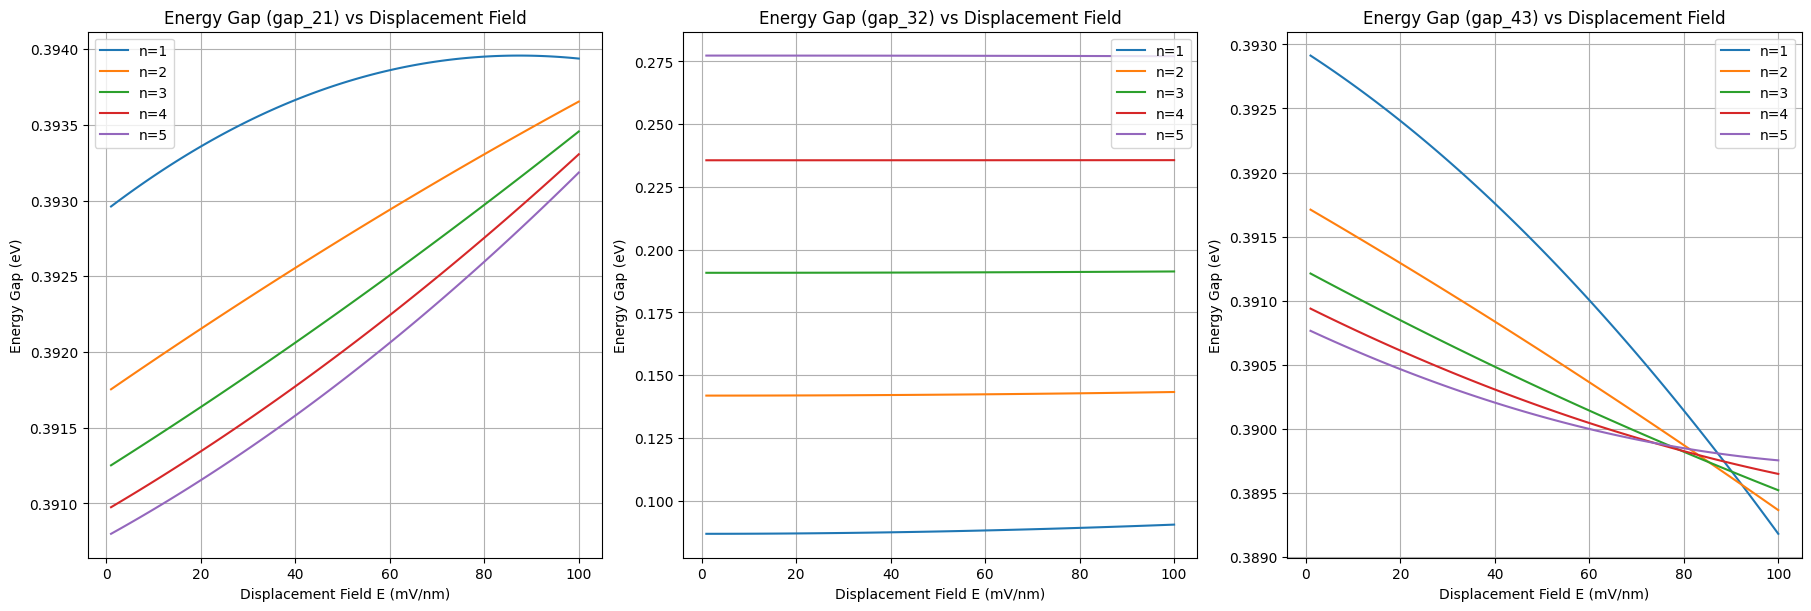

In [5]:
# Function to construct the Hamiltonian matrix with displacement field
def hamiltonian_matrix_E(n, omega_B, potential_difference):
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    
    H_E = np.array([
        [potential_difference, hbar_omega_B_n, 0, 0],
        [hbar_omega_B_n, potential_difference, gamma_1, 0],
        [0, gamma_1, -potential_difference, hbar_omega_B_n_plus_1],
        [0, 0, hbar_omega_B_n_plus_1, -potential_difference]
    ])
    return H_E

# Range of displacement fields (E) in mV/nm
E_values = np.linspace(1, 100, num=100) # From 1 to 100 mV/nm

# Compute energy gaps for each Landau level and displacement field
n_levels = range(1, 6) # Landau levels n=1 to n=5
energy_gaps_21_vs_E = {n: [] for n in n_levels}
energy_gaps_32_vs_E = {n: [] for n in n_levels}
energy_gaps_43_vs_E = {n: [] for n in n_levels}

for E_field in E_values:
    E_field_V_per_m = E_field * 1e6  # Convert mV/nm to V/m
    potential_difference = e * E_field_V_per_m * d / 2
    
    for n in n_levels:
        H_E = hamiltonian_matrix_E(n, omega_B, potential_difference)
        eigenvalues_E = np.linalg.eigvalsh(H_E) / e # Compute eigenvalues in eV
        gap_E_21 = eigenvalues_E[1] - eigenvalues_E[0] # Energy gap between first and second eigenvalues
        gap_E_32 = eigenvalues_E[2] - eigenvalues_E[1] # Energy gap between second and third eigenvalues
        gap_E_43 = eigenvalues_E[3] - eigenvalues_E[2] # Energy gap between third and fourth eigenvalues
        
        energy_gaps_21_vs_E[n].append(gap_E_21)
        energy_gaps_32_vs_E[n].append(gap_E_32)
        energy_gaps_43_vs_E[n].append(gap_E_43)

# Plotting the variation of energy gaps with displacement field for all Landau levels
fig, ax = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Plot for gap_21 (energy gap between the first and second eigenvalues)
for n in n_levels:
    ax[0].plot(E_values, energy_gaps_21_vs_E[n], label=f"n={n}")
ax[0].set_xlabel("Displacement Field E (mV/nm)")
ax[0].set_ylabel("Energy Gap (eV)")
ax[0].set_title("Energy Gap (gap_21) vs Displacement Field")
ax[0].grid(True)
ax[0].legend()

# Plot for gap_32 (energy gap between the second and third eigenvalues)
for n in n_levels:
    ax[1].plot(E_values, energy_gaps_32_vs_E[n], label=f"n={n}")
ax[1].set_xlabel("Displacement Field E (mV/nm)")
ax[1].set_ylabel("Energy Gap (eV)")
ax[1].set_title("Energy Gap (gap_32) vs Displacement Field")
ax[1].grid(True)
ax[1].legend()

# Plot for gap_43 (energy gap between the third and fourth eigenvalues)
for n in n_levels:
    ax[2].plot(E_values, energy_gaps_43_vs_E[n], label=f"n={n}")
ax[2].set_xlabel("Displacement Field E (mV/nm)")
ax[2].set_ylabel("Energy Gap (eV)")
ax[2].set_title("Energy Gap (gap_43) vs Displacement Field")
ax[2].grid(True)
ax[2].legend()

# Show the plots
plt.show()

# K' Valley

In [6]:
# Function to construct the Hamiltonian matrix
def hamiltonian_matrix(n):
    sqrt_n_minus_1 = np.sqrt(n - 1)
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    sqrt_n_plus_2 = np.sqrt(n + 2)
    hbar_omega_B_n_minus_1 = hbar * omega_B * sqrt_n_minus_1
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    
    H = np.array([
        [0, hbar_omega_B_n_plus_1, 0, 0],
        [hbar_omega_B_n_minus_1, 0, gamma_1, 0],
        [0, gamma_1, 0, hbar_omega_B_n_plus_2],
        [0, 0, hbar_omega_B_n, 0]
    ])
    return H

# Compute eigenvalues for different n
n_values = range(1, 6) # Landau levels n >= 1
eigenvalues_all_levels = []

for n in n_values:
    H = hamiltonian_matrix(n)
    eigenvalues, eigenvectors = np.linalg.eigh(H) # Compute eigenvalues
    eigenvalues_all_levels.append(eigenvalues / e) # Convert to eV

# Compute eigenvalues and energy gaps for all Landau levels (n=1 to n=5)
n_levels = range(1, 6) # Landau levels from n=1 to n=5
results = {} # Dictionary to store results for each n

for n in n_levels:
    H = hamiltonian_matrix(n) # Construct Hamiltonian matrix for level n
    eigenvalues, eigenvectors = np.linalg.eigh(H) # Compute eigenvalues and eigenvectors
    eigenvalues_eV = eigenvalues / e # Convert eigenvalues to eV
    energy_gaps_eV = np.diff(eigenvalues_eV) # Compute energy gaps between consecutive eigenvalues
    results[n] = {
        "eigenvalues": eigenvalues_eV,
        "energy_gaps": energy_gaps_eV
    }

# Display results for all levels
for n in n_levels:
    print(f"Landau Level n={n}:")
    print(f"Eigenvalues (in eV): {results[n]['eigenvalues']}")
    print(f"Energy Gaps Between Consecutive Eigenvalues (in eV): {results[n]['energy_gaps']}")
    print()

Landau Level n=1:
Eigenvalues (in eV): [-4.06819550e-01  0.00000000e+00  9.39117908e-18  4.06819550e-01]
Energy Gaps Between Consecutive Eigenvalues (in eV): [4.06819550e-01 9.39117908e-18 4.06819550e-01]

Landau Level n=2:
Eigenvalues (in eV): [-0.43637128 -0.04343434  0.04343434  0.43637128]
Energy Gaps Between Consecutive Eigenvalues (in eV): [0.39293695 0.08686867 0.39293695]

Landau Level n=3:
Eigenvalues (in eV): [-0.46268404 -0.07095213  0.07095213  0.46268404]
Energy Gaps Between Consecutive Eigenvalues (in eV): [0.39173191 0.14190426 0.39173191]

Landau Level n=4:
Eigenvalues (in eV): [-0.48663466 -0.09540298  0.09540298  0.48663466]
Energy Gaps Between Consecutive Eigenvalues (in eV): [0.39123168 0.19080595 0.39123168]

Landau Level n=5:
Eigenvalues (in eV): [-0.50876389 -0.11780753  0.11780753  0.50876389]
Energy Gaps Between Consecutive Eigenvalues (in eV): [0.39095636 0.23561506 0.39095636]



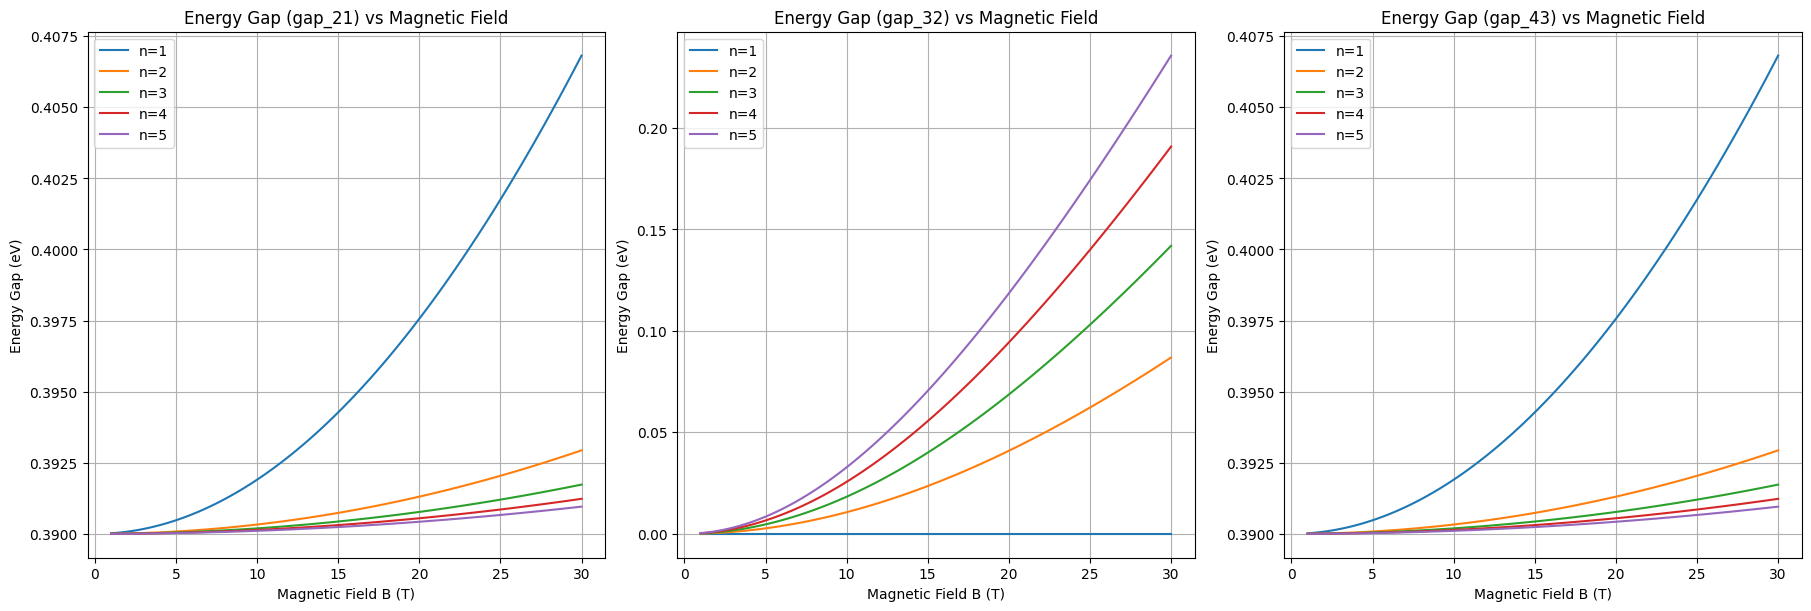

In [7]:
# Function to construct the Hamiltonian matrix
def hamiltonian_matrix(n, omega_B):
    sqrt_n_minus_1 = np.sqrt(n - 1)
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    sqrt_n_plus_2 = np.sqrt(n + 2)
    hbar_omega_B_n_minus_1 = hbar * omega_B * sqrt_n_minus_1
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    
    H = np.array([
        [0, hbar_omega_B_n_plus_1, 0, 0],
        [hbar_omega_B_n_minus_1, 0, gamma_1, 0],
        [0, gamma_1, 0, hbar_omega_B_n_plus_2],
        [0, 0, hbar_omega_B_n, 0]
    ])
    return H

# Magnetic field range (1 T to 30 T)
B_values = np.linspace(1, 30, 100) # Generate 100 points between 1 and 30 Tesla

# Compute energy gaps for each Landau level and magnetic field
n_levels = range(1, 6) # Landau levels n=1 to n=5
energy_gaps_21_vs_B = {n: [] for n in n_levels}
energy_gaps_32_vs_B = {n: [] for n in n_levels}
energy_gaps_43_vs_B = {n: [] for n in n_levels}

for B in B_values:
    omega_B = e * B / m_eff # Cyclotron frequency
    for n in n_levels:
        H = hamiltonian_matrix(n, omega_B)
        eigenvalues = np.linalg.eigvalsh(H) / e # Compute eigenvalues in eV
        gap_21 = eigenvalues[1] - eigenvalues[0]
        gap_32 = eigenvalues[2] - eigenvalues[1]   # Energy gap between second and third eigenvalues
        gap_43 = eigenvalues[3] - eigenvalues[2]
        energy_gaps_21_vs_B[n].append(gap_21)
        energy_gaps_32_vs_B[n].append(gap_32)
        energy_gaps_43_vs_B[n].append(gap_43)

import matplotlib.pyplot as plt

# Create a figure with 3 subplots (axes) in a single row
fig, ax = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Plot for gap_21 (energy gap between the first and second eigenvalues)
for n in n_levels:
    ax[0].plot(B_values, energy_gaps_21_vs_B[n], label=f"n={n}")
ax[0].set_xlabel("Magnetic Field B (T)")
ax[0].set_ylabel("Energy Gap (eV)")
ax[0].set_title("Energy Gap (gap_21) vs Magnetic Field")
ax[0].grid(True)
ax[0].legend()

# Plot for gap_32 (energy gap between the second and third eigenvalues)
for n in n_levels:
    ax[1].plot(B_values, energy_gaps_32_vs_B[n], label=f"n={n}")
ax[1].set_xlabel("Magnetic Field B (T)")
ax[1].set_ylabel("Energy Gap (eV)")
ax[1].set_title("Energy Gap (gap_32) vs Magnetic Field")
ax[1].grid(True)
ax[1].legend()

# Plot for gap_43 (energy gap between the third and fourth eigenvalues)
for n in n_levels:
    ax[2].plot(B_values, energy_gaps_43_vs_B[n], label=f"n={n}")
ax[2].set_xlabel("Magnetic Field B (T)")
ax[2].set_ylabel("Energy Gap (eV)")
ax[2].set_title("Energy Gap (gap_43) vs Magnetic Field")
ax[2].grid(True)
ax[2].legend()

# Show the plots
plt.show()

## Introducing Electric Field

In [8]:
d = 3.35e-10          # Interlayer distance for BLG (m)
E_field = 35          # Electric field in mV/nm (convert to V/m)

# Convert electric field to potential difference
E_field_V_per_m = E_field * 1e6  # Convert mV/nm to V/m
potential_difference = e * E_field_V_per_m * d / 2

# Function to construct the Hamiltonian matrix with displacement field
def hamiltonian_matrix_E(n):
    sqrt_n_minus_1 = np.sqrt(n - 1)
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    sqrt_n_plus_2 = np.sqrt(n + 2)
    hbar_omega_B_n_minus_1 = hbar * omega_B * sqrt_n_minus_1
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    
    H_E = np.array([
        [potential_difference, hbar_omega_B_n_plus_1, 0, 0],
        [hbar_omega_B_n_minus_1, potential_difference, gamma_1, 0],
        [0, gamma_1, -potential_difference, hbar_omega_B_n_plus_2],
        [0, 0, hbar_omega_B_n, -potential_difference]
    ])
    return H_E

# Compute eigenvalues for different n
n_values = range(1, 6) # Landau levels n >= 1
eigenvalues_all_levels_E = []



for n in n_values:
    H_E = hamiltonian_matrix_E(n)
    eigenvalues_E, eigenvectors_E = np.linalg.eigh(H_E) # Compute eigenvalues
    eigenvalues_all_levels_E.append(eigenvalues_E / e) # Convert to eV

# Compute eigenvalues and energy gaps for all Landau levels (n=1 to n=5)
n_levels = range(1, 6) # Landau levels from n=1 to n=5
results = {} # Dictionary to store results for each n

for n in n_levels:
    H_E = hamiltonian_matrix_E(n) # Construct Hamiltonian matrix for level n
    eigenvalues_E, eigenvectors_E = np.linalg.eigh(H_E) # Compute eigenvalues and eigenvectors
    eigenvalues_eV_E = eigenvalues_E / e # Convert eigenvalues to eV
    energy_gaps_eV_E = np.diff(eigenvalues_eV_E) # Compute energy gaps between consecutive eigenvalues
    results[n] = {
        "eigenvalues": eigenvalues_eV_E,
        "energy_gaps": energy_gaps_eV_E
    }

# Display results for all levels
for n in n_levels:
    print(f"Landau Level n={n}:")
    print(f"Eigenvalues (in eV): {results[n]['eigenvalues']}")
    print(f"Energy Gaps Between Consecutive Eigenvalues (in eV): {results[n]['energy_gaps']}")
    print()

Landau Level n=1:
Eigenvalues (in eV): [-0.40734251 -0.00491308  0.0058625   0.40639309]
Energy Gaps Between Consecutive Eigenvalues (in eV): [0.40242942 0.01077558 0.40053059]

Landau Level n=2:
Eigenvalues (in eV): [-0.43684353 -0.04324604  0.0440794   0.43601017]
Energy Gaps Between Consecutive Eigenvalues (in eV): [0.39359749 0.08732544 0.39193077]

Landau Level n=3:
Eigenvalues (in eV): [-0.4631203  -0.07066432  0.07141588  0.46236874]
Energy Gaps Between Consecutive Eigenvalues (in eV): [0.39245597 0.14208021 0.39095286]

Landau Level n=4:
Eigenvalues (in eV): [-0.48704363 -0.09509046  0.09578038  0.48635372]
Energy Gaps Between Consecutive Eigenvalues (in eV): [0.39195317 0.19087084 0.39057334]

Landau Level n=5:
Eigenvalues (in eV): [-0.50915125 -0.11748965  0.11813096  0.50850994]
Energy Gaps Between Consecutive Eigenvalues (in eV): [0.39166161 0.23562061 0.39037898]



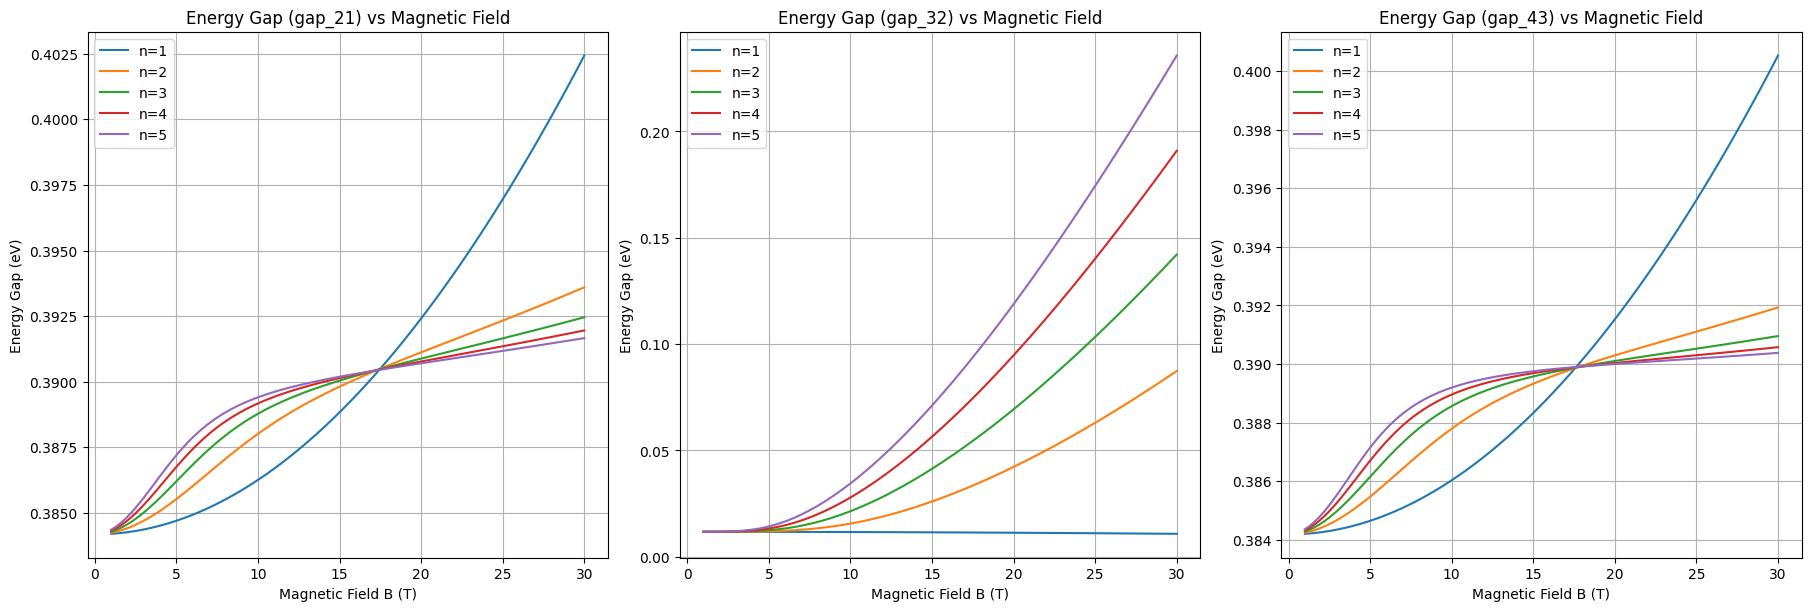

In [9]:
# Function to construct the Hamiltonian matrix with displacement field
def hamiltonian_matrix_E(n, omega_B):
    sqrt_n_minus_1 = np.sqrt(n - 1)
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    sqrt_n_plus_2 = np.sqrt(n + 2)
    hbar_omega_B_n_minus_1 = hbar * omega_B * sqrt_n_minus_1
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    
    H_E = np.array([
        [potential_difference, hbar_omega_B_n_plus_1, 0, 0],
        [hbar_omega_B_n_minus_1, potential_difference, gamma_1, 0],
        [0, gamma_1, -potential_difference, hbar_omega_B_n_plus_2],
        [0, 0, hbar_omega_B_n, -potential_difference]
    ])
    return H_E

# Magnetic field range (1 T to 30 T)
B_values = np.linspace(1, 30, 100) # Generate 100 points between 1 and 30 Tesla

# Compute energy gaps for each Landau level and magnetic field
n_levels = range(1, 6) # Landau levels n=1 to n=5
energy_gaps_E_21_vs_B = {n: [] for n in n_levels}
energy_gaps_E_32_vs_B = {n: [] for n in n_levels}
energy_gaps_E_43_vs_B = {n: [] for n in n_levels}

for B in B_values:
    omega_B = e * B / m_eff # Cyclotron frequency
    for n in n_levels:
        H_E = hamiltonian_matrix_E(n, omega_B)
        eigenvalues_E = np.linalg.eigvalsh(H_E) / e # Compute eigenvalues in eV
        gap_E_21 = eigenvalues_E[1] - eigenvalues_E[0]
        gap_E_32 = eigenvalues_E[2] - eigenvalues_E[1]   # Energy gap between second and third eigenvalues
        gap_E_43 = eigenvalues_E[3] - eigenvalues_E[2]
        energy_gaps_E_21_vs_B[n].append(gap_E_21)
        energy_gaps_E_32_vs_B[n].append(gap_E_32)
        energy_gaps_E_43_vs_B[n].append(gap_E_43)

import matplotlib.pyplot as plt

# Create a figure with 3 subplots (axes) in a single row
fig, ax = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Plot for gap_21 (energy gap between the first and second eigenvalues)
for n in n_levels:
    ax[0].plot(B_values, energy_gaps_E_21_vs_B[n], label=f"n={n}")
ax[0].set_xlabel("Magnetic Field B (T)")
ax[0].set_ylabel("Energy Gap (eV)")
ax[0].set_title("Energy Gap (gap_21) vs Magnetic Field")
ax[0].grid(True)
ax[0].legend()

# Plot for gap_32 (energy gap between the second and third eigenvalues)
for n in n_levels:
    ax[1].plot(B_values, energy_gaps_E_32_vs_B[n], label=f"n={n}")
ax[1].set_xlabel("Magnetic Field B (T)")
ax[1].set_ylabel("Energy Gap (eV)")
ax[1].set_title("Energy Gap (gap_32) vs Magnetic Field")
ax[1].grid(True)
ax[1].legend()

# Plot for gap_43 (energy gap between the third and fourth eigenvalues)
for n in n_levels:
    ax[2].plot(B_values, energy_gaps_E_43_vs_B[n], label=f"n={n}")
ax[2].set_xlabel("Magnetic Field B (T)")
ax[2].set_ylabel("Energy Gap (eV)")
ax[2].set_title("Energy Gap (gap_43) vs Magnetic Field")
ax[2].grid(True)
ax[2].legend()

# Show the plots
plt.show()

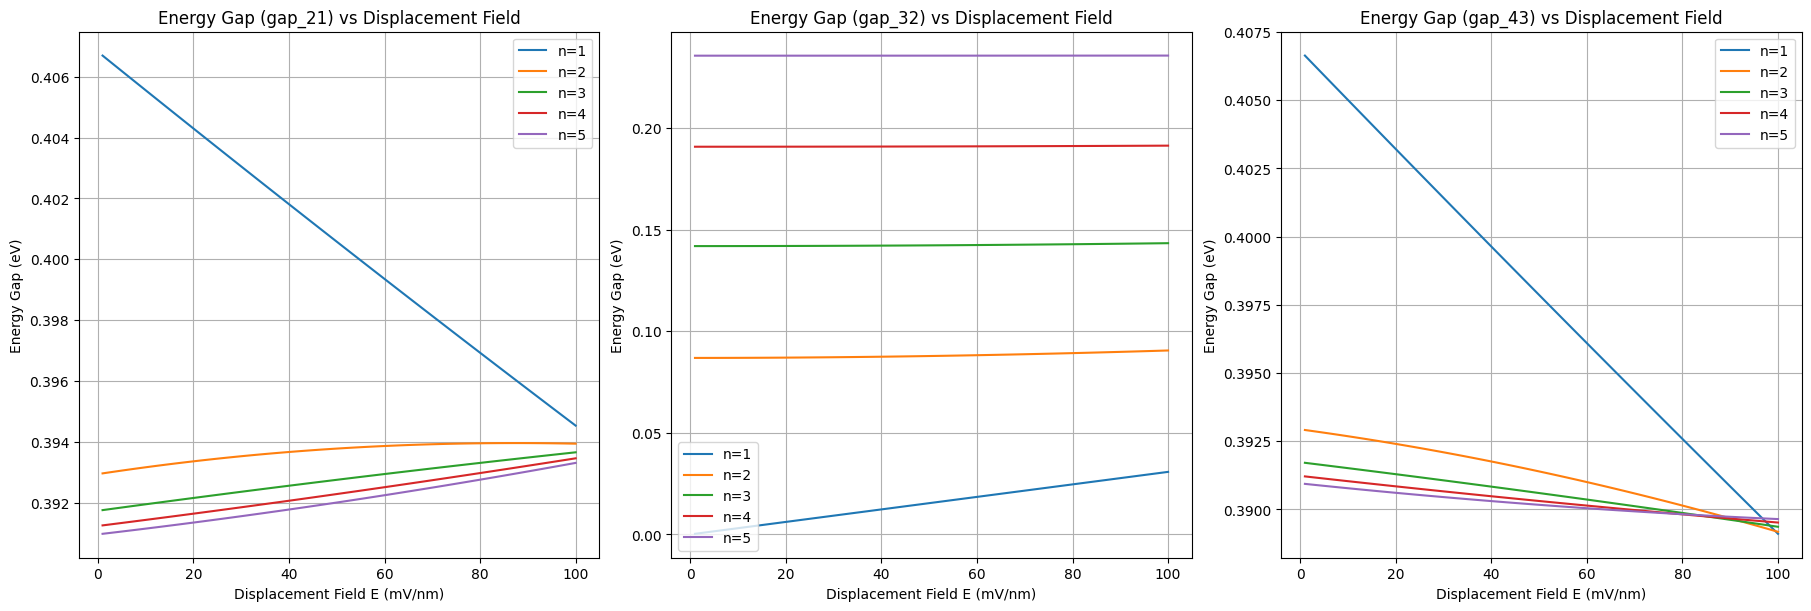

In [10]:
# Function to construct the Hamiltonian matrix with displacement field
def hamiltonian_matrix_E(n, omega_B, potential_difference):
    sqrt_n_minus_1 = np.sqrt(n - 1)
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    sqrt_n_plus_2 = np.sqrt(n + 2)
    hbar_omega_B_n_minus_1 = hbar * omega_B * sqrt_n_minus_1
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    hbar_omega_B_n_plus_2 = hbar * omega_B * sqrt_n_plus_2
    
    H_E = np.array([
        [potential_difference, hbar_omega_B_n_plus_1, 0, 0],
        [hbar_omega_B_n_minus_1, potential_difference, gamma_1, 0],
        [0, gamma_1, -potential_difference, hbar_omega_B_n_plus_2],
        [0, 0, hbar_omega_B_n, -potential_difference]
    ])
    return H_E

# Range of displacement fields (E) in mV/nm
E_values = np.linspace(1, 100, num=100) # From 1 to 100 mV/nm

# Compute energy gaps for each Landau level and displacement field
n_levels = range(1, 6) # Landau levels n=1 to n=5
energy_gaps_21_vs_E = {n: [] for n in n_levels}
energy_gaps_32_vs_E = {n: [] for n in n_levels}
energy_gaps_43_vs_E = {n: [] for n in n_levels}

for E_field in E_values:
    E_field_V_per_m = E_field * 1e6  # Convert mV/nm to V/m
    potential_difference = e * E_field_V_per_m * d / 2
    
    for n in n_levels:
        H_E = hamiltonian_matrix_E(n, omega_B, potential_difference)
        eigenvalues_E = np.linalg.eigvalsh(H_E) / e # Compute eigenvalues in eV
        gap_E_21 = eigenvalues_E[1] - eigenvalues_E[0] # Energy gap between first and second eigenvalues
        gap_E_32 = eigenvalues_E[2] - eigenvalues_E[1] # Energy gap between second and third eigenvalues
        gap_E_43 = eigenvalues_E[3] - eigenvalues_E[2] # Energy gap between third and fourth eigenvalues
        
        energy_gaps_21_vs_E[n].append(gap_E_21)
        energy_gaps_32_vs_E[n].append(gap_E_32)
        energy_gaps_43_vs_E[n].append(gap_E_43)

# Plotting the variation of energy gaps with displacement field for all Landau levels
fig, ax = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Plot for gap_21 (energy gap between the first and second eigenvalues)
for n in n_levels:
    ax[0].plot(E_values, energy_gaps_21_vs_E[n], label=f"n={n}")
ax[0].set_xlabel("Displacement Field E (mV/nm)")
ax[0].set_ylabel("Energy Gap (eV)")
ax[0].set_title("Energy Gap (gap_21) vs Displacement Field")
ax[0].grid(True)
ax[0].legend()

# Plot for gap_32 (energy gap between the second and third eigenvalues)
for n in n_levels:
    ax[1].plot(E_values, energy_gaps_32_vs_E[n], label=f"n={n}")
ax[1].set_xlabel("Displacement Field E (mV/nm)")
ax[1].set_ylabel("Energy Gap (eV)")
ax[1].set_title("Energy Gap (gap_32) vs Displacement Field")
ax[1].grid(True)
ax[1].legend()

# Plot for gap_43 (energy gap between the third and fourth eigenvalues)
for n in n_levels:
    ax[2].plot(E_values, energy_gaps_43_vs_E[n], label=f"n={n}")
ax[2].set_xlabel("Displacement Field E (mV/nm)")
ax[2].set_ylabel("Energy Gap (eV)")
ax[2].set_title("Energy Gap (gap_43) vs Displacement Field")
ax[2].grid(True)
ax[2].legend()

# Show the plots
plt.show()

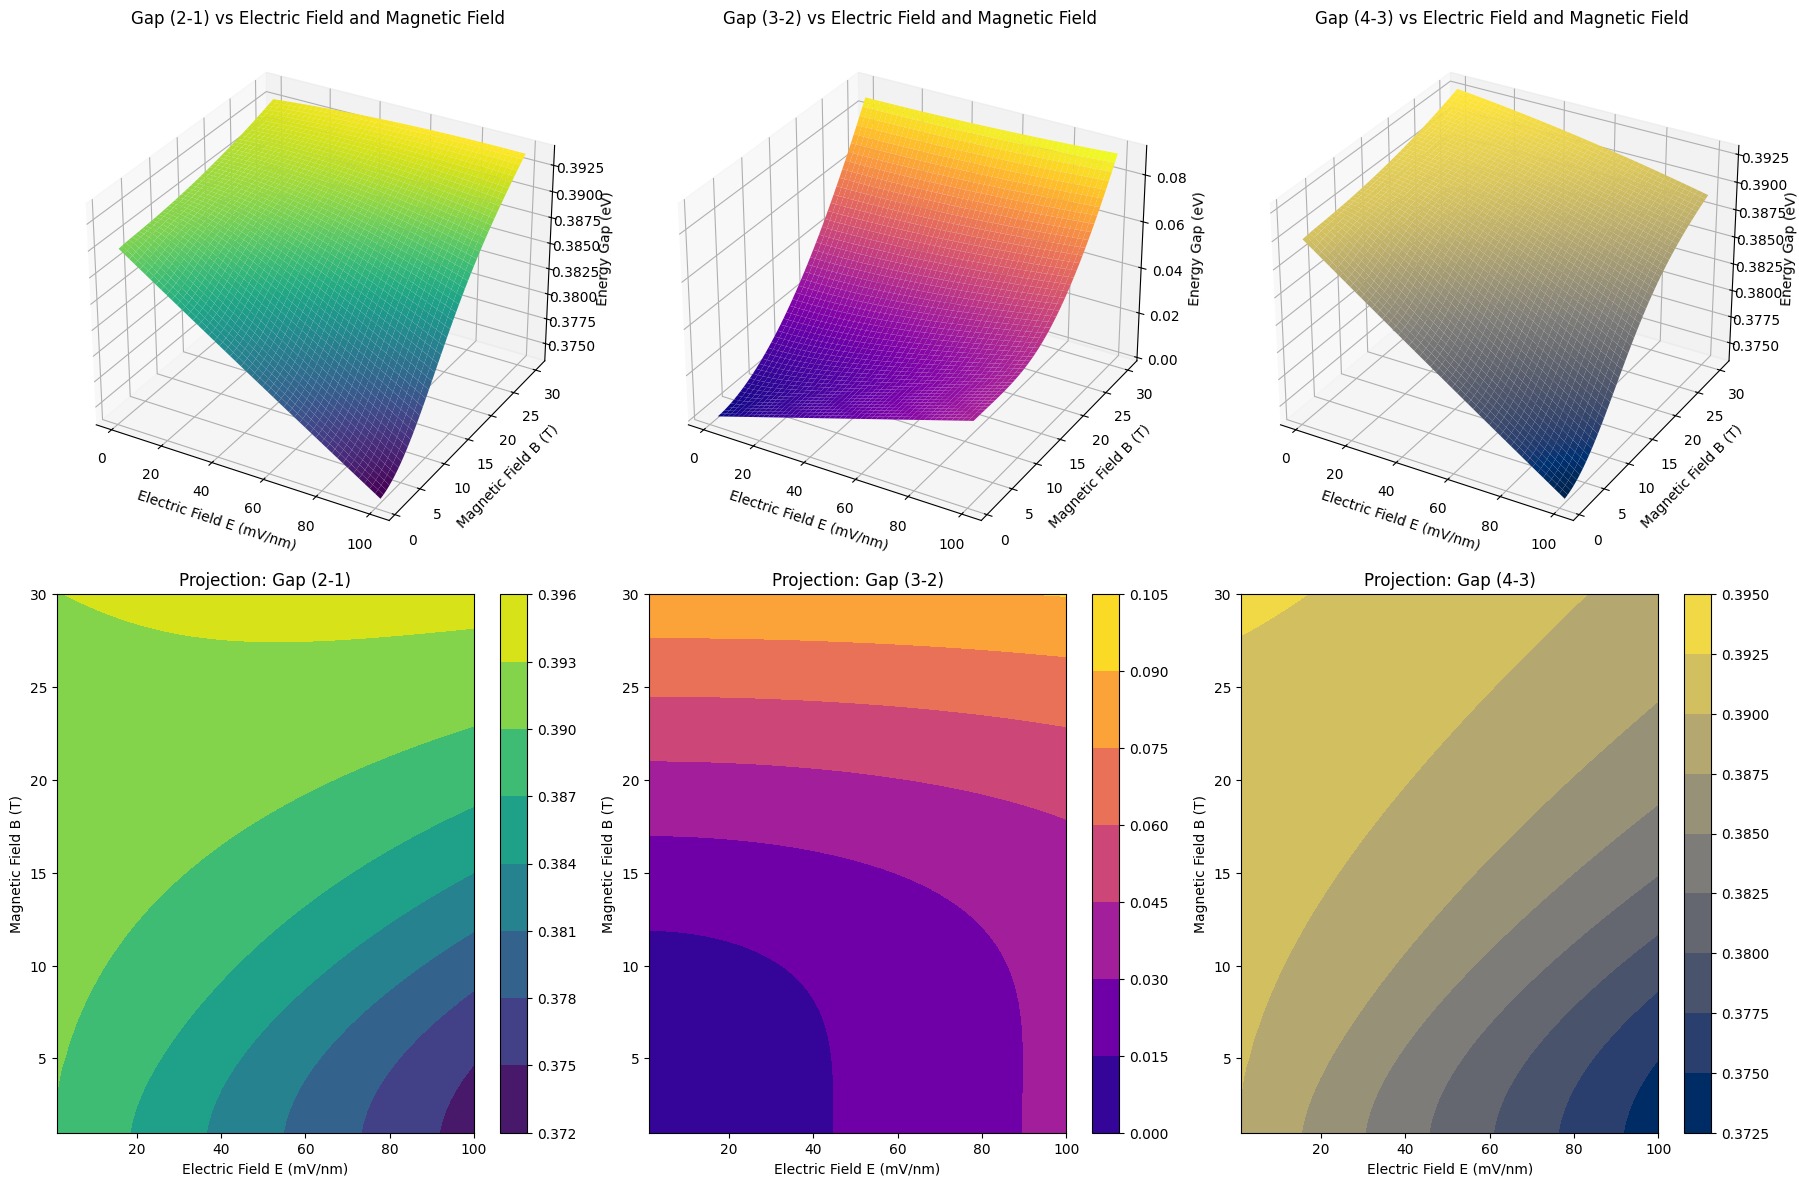

In [11]:
## K Valley

from mpl_toolkits.mplot3d import Axes3D

# Function to construct the Hamiltonian matrix
def hamiltonian_matrix(n, omega_B, potential_difference):
    sqrt_n = np.sqrt(n)
    sqrt_n_plus_1 = np.sqrt(n + 1)
    hbar_omega_B_n = hbar * omega_B * sqrt_n
    hbar_omega_B_n_plus_1 = hbar * omega_B * sqrt_n_plus_1
    
    H = np.array([
        [potential_difference, hbar_omega_B_n, 0, 0],
        [hbar_omega_B_n, potential_difference, gamma_1, 0],
        [0, gamma_1, -potential_difference, hbar_omega_B_n_plus_1],
        [0, 0, hbar_omega_B_n_plus_1, -potential_difference]
    ])
    return H

# Range of electric fields (E) in mV/nm and magnetic fields (B) in Tesla
E_values = np.linspace(1, 100, num=50) # Electric field from 1 to 100 mV/nm
B_values = np.linspace(1, 30, num=50)  # Magnetic field from 1 to 30 T

# Landau level index
n = 1

# Arrays to store results
gap_21 = np.zeros((len(E_values), len(B_values))) # Energy gap between eigenvalues 2 and 1
gap_32 = np.zeros((len(E_values), len(B_values))) # Energy gap between eigenvalues 3 and 2
gap_43 = np.zeros((len(E_values), len(B_values))) # Energy gap between eigenvalues 4 and 3

# Compute energy gaps for each combination of E and B
for i, E_field in enumerate(E_values):
    E_field_V_per_m = E_field * 1e6  # Convert mV/nm to V/m
    potential_difference = e * E_field_V_per_m * d / 2
    
    for j, B in enumerate(B_values):
        omega_B = e * B / (0.03 * m_e) # Cyclotron frequency for effective mass of electron in BLG
        H = hamiltonian_matrix(n, omega_B, potential_difference)
        eigenvalues = np.linalg.eigvalsh(H) / e # Compute eigenvalues in eV
        
        gap_21[i, j] = eigenvalues[1] - eigenvalues[0] # Gap between first and second eigenvalues
        gap_32[i, j] = eigenvalues[2] - eigenvalues[1] # Gap between second and third eigenvalues
        gap_43[i, j] = eigenvalues[3] - eigenvalues[2] # Gap between third and fourth eigenvalues

# Create a meshgrid for plotting
E_mesh, B_mesh = np.meshgrid(E_values, B_values)

# Plotting the results
fig = plt.figure(figsize=(18, 12))

# Plot for gap_21
ax1 = fig.add_subplot(231, projection='3d')
ax1.plot_surface(E_mesh, B_mesh, gap_21.T, cmap='viridis')
ax1.set_title("Gap (2-1) vs Electric Field and Magnetic Field")
ax1.set_xlabel("Electric Field E (mV/nm)")
ax1.set_ylabel("Magnetic Field B (T)")
ax1.set_zlabel("Energy Gap (eV)")

# Plot for gap_32
ax2 = fig.add_subplot(232, projection='3d')
ax2.plot_surface(E_mesh, B_mesh, gap_32.T, cmap='plasma')
ax2.set_title("Gap (3-2) vs Electric Field and Magnetic Field")
ax2.set_xlabel("Electric Field E (mV/nm)")
ax2.set_ylabel("Magnetic Field B (T)")
ax2.set_zlabel("Energy Gap (eV)")

# Plot for gap_43
ax3 = fig.add_subplot(233, projection='3d')
ax3.plot_surface(E_mesh, B_mesh, gap_43.T, cmap='cividis')
ax3.set_title("Gap (4-3) vs Electric Field and Magnetic Field")
ax3.set_xlabel("Electric Field E (mV/nm)")
ax3.set_ylabel("Magnetic Field B (T)")
ax3.set_zlabel("Energy Gap (eV)")

# Projections: Contour plots for each energy gap
ax4 = fig.add_subplot(234)
contour_gap21 = ax4.contourf(E_mesh, B_mesh, gap_21.T, cmap='viridis')
fig.colorbar(contour_gap21, ax=ax4)
ax4.set_title("Projection: Gap (2-1)")
ax4.set_xlabel("Electric Field E (mV/nm)")
ax4.set_ylabel("Magnetic Field B (T)")

ax5 = fig.add_subplot(235)
contour_gap32 = ax5.contourf(E_mesh, B_mesh, gap_32.T, cmap='plasma')
fig.colorbar(contour_gap32, ax=ax5)
ax5.set_title("Projection: Gap (3-2)")
ax5.set_xlabel("Electric Field E (mV/nm)")
ax5.set_ylabel("Magnetic Field B (T)")

ax6 = fig.add_subplot(236)
contour_gap43 = ax6.contourf(E_mesh, B_mesh, gap_43.T, cmap='cividis')
fig.colorbar(contour_gap43, ax=ax6)
ax6.set_title("Projection: Gap (4-3)")
ax6.set_xlabel("Electric Field E (mV/nm)")
ax6.set_ylabel("Magnetic Field B (T)")

plt.tight_layout()
plt.show()